Purpose of this Scripts  
1) find FFT peaks  
2) get phase and amplitude map
3) phase and amplitude surgery
4) fix guage
5) export
   1) phase and amplitude(Fundamental)
   2) dataframe(useful sub datas)

# Load cleaned Topography

## Call from HDD

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from useful import *
arrSries  = pd.Series()
fns = ['2HTaSe2_bad_78K097','2HTaSe2_ap_118K002','2HTaSe2_bae_110K012','2HTaSe2_ao_115K037','test']
arr_clns = []

for fn in fns:
    arrSries[fn] = np.load(f'{fn}_cln.npy')
    arr_clns.append(arrSries[fn])

## Manually defined parameter

In [2]:
colors = ['#9467bd','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
nms = ['78K(1)', '118K', '110K', '115K','78K(2)']
Ts = [78, 118, 110, 115,78]
nano = [160,40,80,40,80]
sz = [2048,512,1024,1024,2048]
pxl20nms = [int((sz[idt] / nano[idt]) * 20) for idt in range(len(fns))]
cntrs = [np.array(arrSries[fn].shape)//2 for fn in fns]
resol = np.array(pxl20nms)/256

In [3]:
df = pd.DataFrame({
    'fns': fns,
    'arr_clns': arr_clns,
    'colors': colors,
    'nms': nms,
    'Ts': Ts,
    'nano': nano,
    'sz': sz
    ,'pxl20nm': pxl20nms
    ,'cntrs': cntrs
    ,'resol': resol
})
df

fns                                           arr_clns  \
0   2HTaSe2_bad_78K097  [[1.0103092144283519e-13, -3.5913526062327836e...   
1   2HTaSe2_ap_118K002  [[-1.5468118784470648e-12, 1.358354867116372e-...   
2  2HTaSe2_bae_110K012  [[-1.399080145167011e-12, -2.5197514098938278e...   
3   2HTaSe2_ao_115K037  [[5.857832103672808e-13, 2.382601548993847e-12...   
4                 test  [[4.992021943206503e-12, 3.452972262860198e-12...   

    colors     nms   Ts  nano    sz  pxl20nm         cntrs  resol  
0  #9467bd  78K(1)   78   160  2048      256  [1024, 1024]    1.0  
1  #1f77b4    118K  118    40   512      256    [256, 256]    1.0  
2  #ff7f0e    110K  110    80  1024      256    [512, 512]    1.0  
3  #2ca02c    115K  115    40  1024      512    [512, 512]    2.0  
4  #d62728  78K(2)   78    80  2048      512  [1024, 1024]    2.0

# Topography

## Topography:large,tab

In [4]:
# tab

## Topography:one size

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Text(0.5, 0.98, '2H-TaSe2 STM topography by temperature')

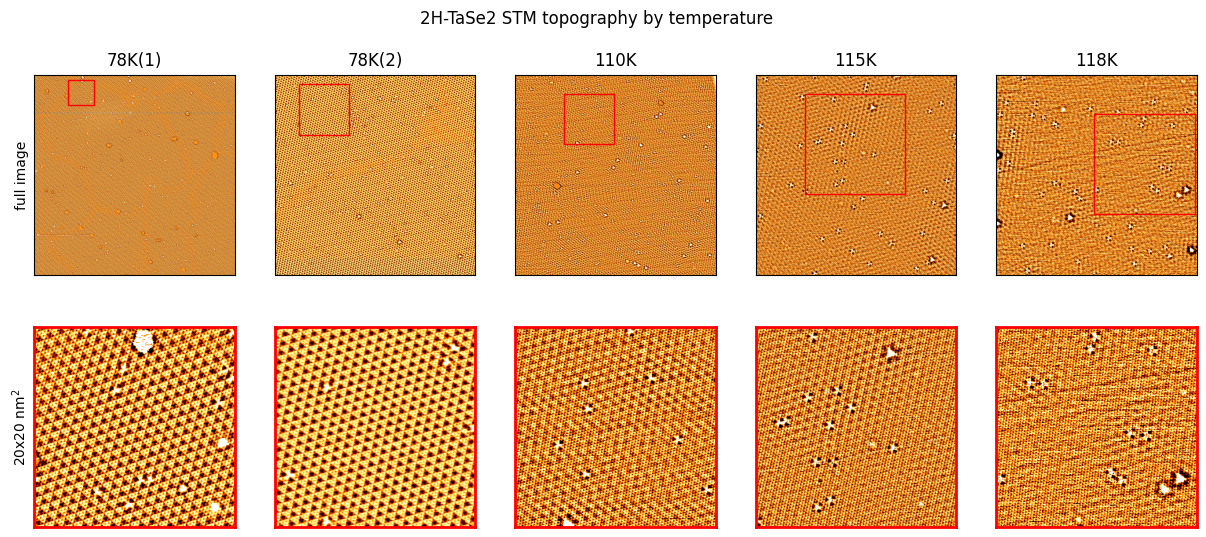

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
idts = [0,4,2,3,1]
x0, y0 = 250, 100
x0_, y0_ = 350, 50
x0s = [x0_,x0,x0,x0,x0]
y0s = [y0_,y0,y0,y0,y0]

fig,axs = plt.subplots(2,5,figsize=(15,6))
for idt,isb,x0,y0 in zip(idts,range(len(idts)),x0s,y0s):
    ax = axs[0,isb]
    plt.sca(ax)    
    arr = arrSries[fns[idt]]
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()
    ax.set_title(df['nms'][idt])
    pxl20nm = int((sz[idt]/nano[idt]) *20)
    if isb == 0:
        ax.set_ylabel('full image')
    
    ax = axs[1,isb]
    plt.sca(ax)    
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()    
    ax.set_xlim(x0,pxl20nm+x0)
    ax.set_ylim(pxl20nm+y0,y0)
    for spine in ax.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)
    if isb == 0:
        ax.set_ylabel('20x20 nm$^2$')
from matplotlib.patches import Rectangle
for idt, isb, x0, y0 in zip(idts, range(len(idts)), x0s, y0s):
    ax = axs[0, isb]
    pxl20nm = int((sz[idt] / nano[idt]) * 20)
    rect = Rectangle((x0, y0), pxl20nm, pxl20nm, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.suptitle('2H-TaSe2 STM topography by temperature')


# FFT

## manual define peak

### fcns

In [6]:
import imagingPhase.ffts as imfft

imagingPhase package loaded


In [7]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0#0.0000000001 # @param
choose = [0] # @param

In [8]:
chooses = [
    [7,8,11],
    [1,4,3],
    [1,4,7],
    [1,2,5],
    [7,2,5]
]

[[1138 1547]
 [ 494  847]
 [1450  679]]
3
[[274 398]
 [111 208]
 [382 162]]
3
[[559 793]
 [216 417]
 [763 327]]
3
[[543 654]
 [363 464]
 [630 418]]
3
[[1076 1282]
 [ 747  937]
 [1249  854]]
3


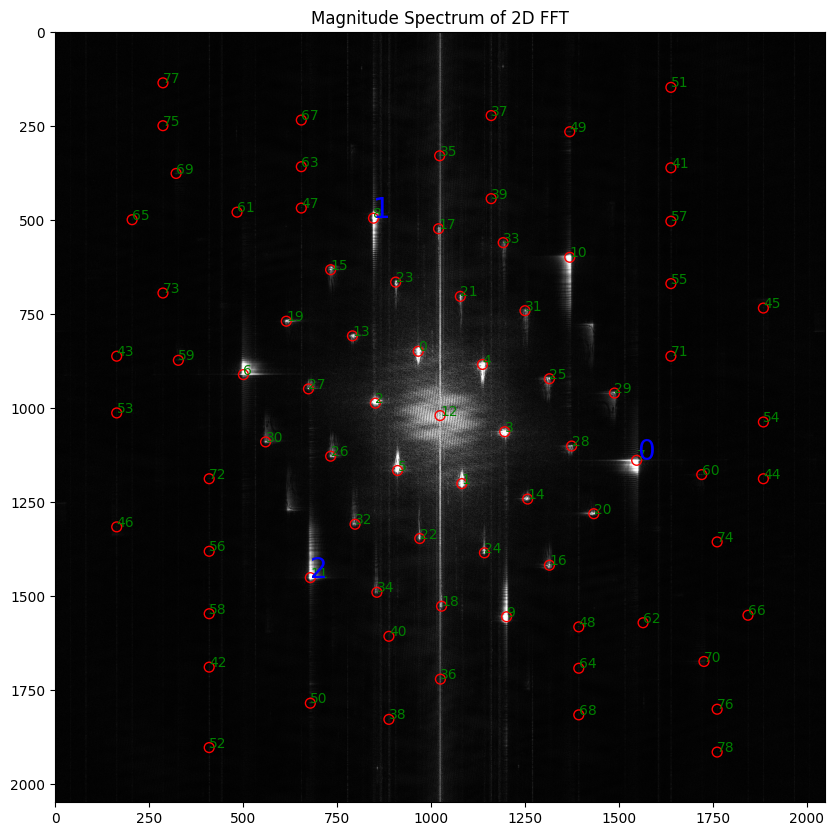

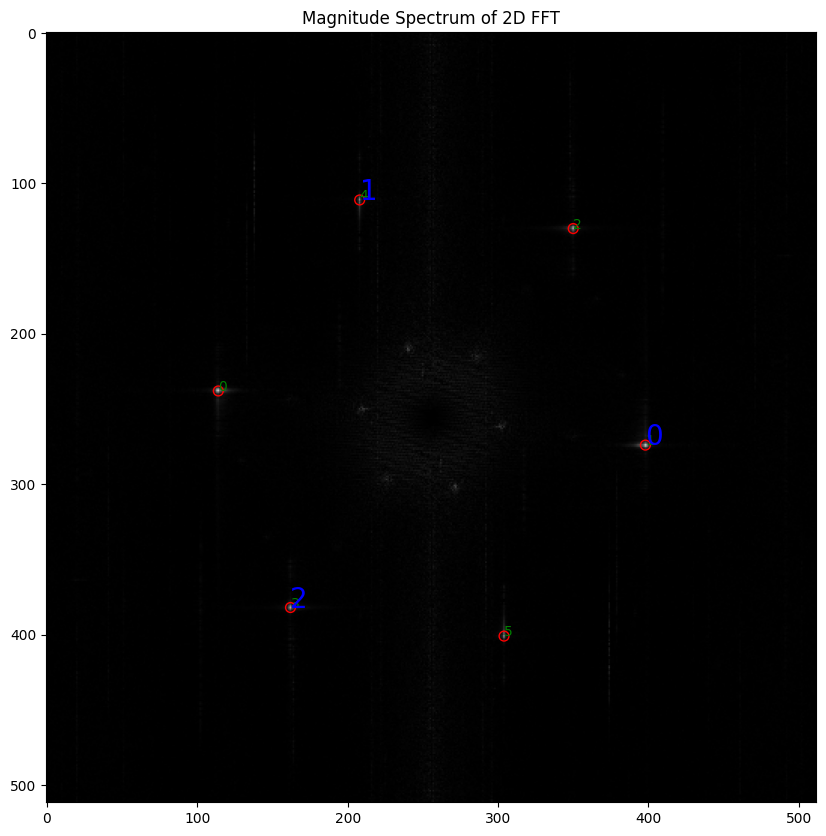

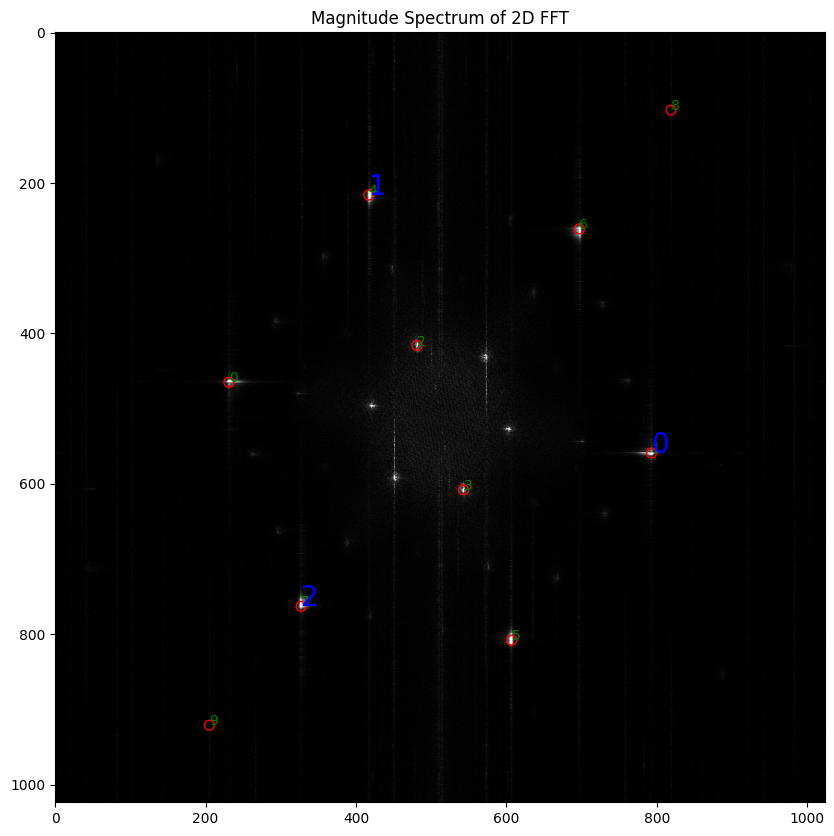

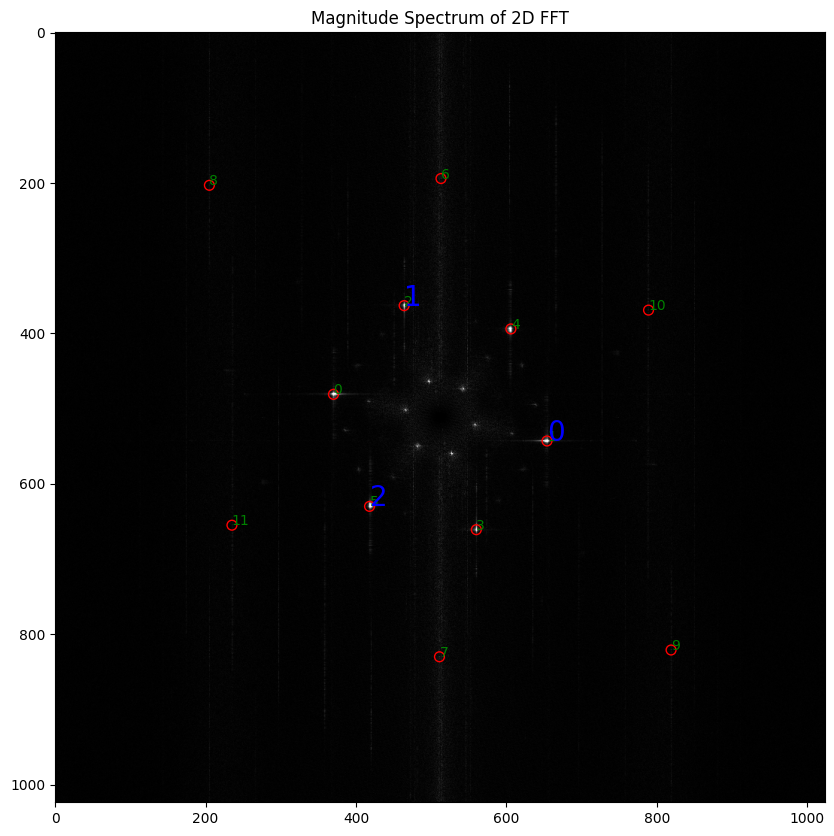

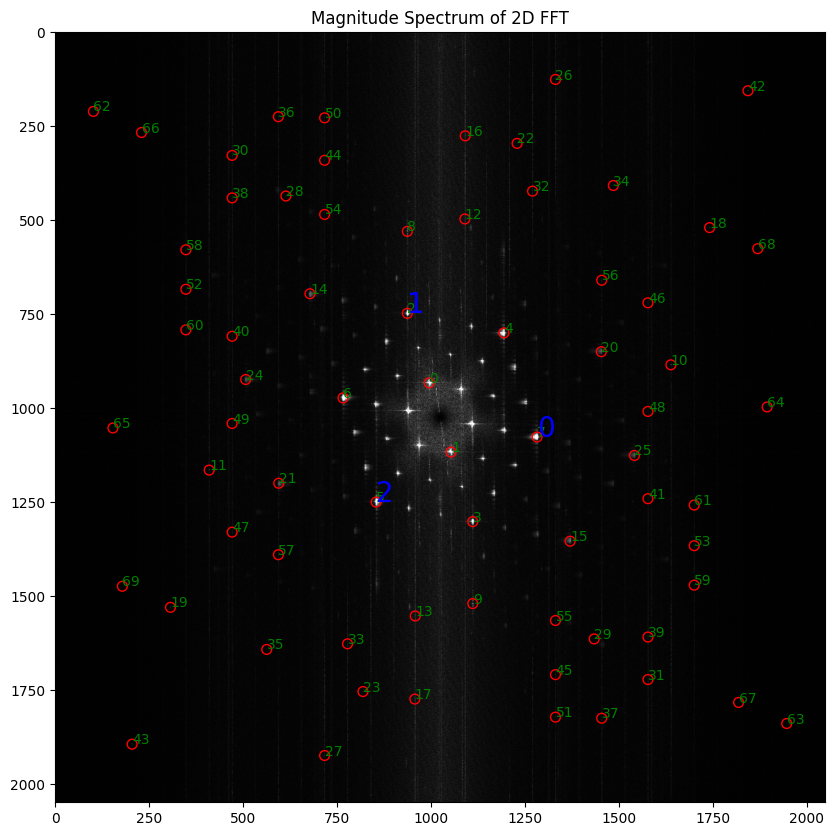

In [28]:
%matplotlib inline
arrsz =[]
ffts = []
pk_chooses = []
for fn,choose in zip(fns,chooses):
    arr_cln = arrSries[fn]
    arrsz.append(arr_cln.shape)
    fft2abs = imfft.fft2show(arr_cln,vmin,vmax)
    pk_choose,pk_all = imfft.fft2pkfnd(fft2abs,threshold,choose)
    pk_chooses.append(pk_choose)
    ffts.append(plt.gcf()) 
    # plt.close()
        

In [10]:
df['k123'] = pk_chooses

In [11]:
df

fns                                           arr_clns  \
0   2HTaSe2_bad_78K097  [[1.0103092144283519e-13, -3.5913526062327836e...   
1   2HTaSe2_ap_118K002  [[-1.5468118784470648e-12, 1.358354867116372e-...   
2  2HTaSe2_bae_110K012  [[-1.399080145167011e-12, -2.5197514098938278e...   
3   2HTaSe2_ao_115K037  [[5.857832103672808e-13, 2.382601548993847e-12...   
4                 test  [[4.992021943206503e-12, 3.452972262860198e-12...   

    colors     nms   Ts  nano    sz  pxl20nm         cntrs  resol  \
0  #9467bd  78K(1)   78   160  2048      256  [1024, 1024]    1.0   
1  #1f77b4    118K  118    40   512      256    [256, 256]    1.0   
2  #ff7f0e    110K  110    80  1024      256    [512, 512]    1.0   
3  #2ca02c    115K  115    40  1024      512    [512, 512]    2.0   
4  #d62728  78K(2)   78    80  2048      512  [1024, 1024]    2.0   

                                                k123  
0  [[114.0, 523.0], [-530.0, -177.0], [426.0, -34...  
1   [[18.0, 142.0], [-145.0, -48.0], [126.0, -94.0]]  
2  [[47.0, 281.0], [-296.0, -95.0], [251.0, -185.0]]  
3   [[31.0, 142.0], [-149.0, -48.0], [118.0, -94.0]]  
4  [[52.0, 258.0], [-277.0, -87.0], [225.0, -170.0]]

# get phase and amplitude

In [12]:
import imagingPhase.get_phimap as gpm
fns  

['2HTaSe2_bad_78K097',
 '2HTaSe2_ap_118K002',
 '2HTaSe2_bae_110K012',
 '2HTaSe2_ao_115K037',
 'test']

## phase

In [13]:
sigs = np.array([5,5,5,10,10])
angle_restoress = []
for idt,sig in zip(range(len(fns)),sigs):
    arr = arrSries[fns[idt]]
    pk_choose = pk_chooses[idt]
    ks_Latt = pk_choose[:3]
    angle_restores = gpm.phi2Hrecover(arr, pk_choose, sig)
    angle_restoress.append(angle_restores)
    print(f'finished {idt}')

finished 0
finished 1
finished 2
finished 3
finished 4


## amplitude

In [14]:
xprodss = []
ampss = []
for idt in range(len(fns)):
    arr = arrSries[fns[idt]]
    xprods = []
    amps = []
    for ik in range(3):        
        k = pk_chooses[idt][ik]
        xprod = gpm.kdisplacementmap(arr,k,.1)
        amp = np.abs(xprod)
        xprods.append(xprod)
    xprodss.append(xprods)
    ampss.append(ampss)

In [15]:
pa = [angle_restoress ,ampss]

# Surgery

In [16]:
# who's patient
fns
ipatients = [0,4]
affecteds = [396,1875]
xlimylims = [((350,800),(250,600)),
             ((100,2000),(1600,2000))]
ipatient = [0,4]



## remove step

In [17]:
# find affected
import imagingPhase.surgery as sgr
ipas = [0,0]
of2s = [0,1]

# ipa = 0
for kof3 in range(3):
    for of2,ipa  in zip(of2s,ipas):
        idt = ipatient[of2]
        affected = affecteds[of2]
        sField = pa[ipa][idt][kof3]
        if ipa == 1:
            sField = np.abs(sField)
        foo = sgr.stepRecover(sField)
        foo.x_lims = xlimylims[of2][0] #(350,800)
        foo.y_lims = xlimylims[of2][1]#(250,600)
        foo.y_affected = affected
        foo.fit()
        pa[ipa][idt][kof3] = foo.arr_flat

# f,axs = foo.imshow()

fitted
(350,)
fitted
(400,)
fitted
(350,)
fitted
(400,)
fitted
(350,)
fitted
(400,)


d:\github\2H_TaSe2_Tc_STM\imagingPhase\surgery.py:17: RuntimeWarning: overflow encountered in exp
  return A + (L - A) / (1 + np.exp(-k * (x - x0)))


## Local gaussian

In [18]:
import numpy as np
from scipy.ndimage import gaussian_filter

def localized_gaussian_blur(img, axis="x", line_pos=100, band_width=20, sigma_blur=3, sigma_mask=10):
    """
    국소적으로 Gaussian blur 적용 함수
    
    Parameters
    ----------
    img : 2D numpy array
        입력 이미지
    axis : str, "x" or "y"
        선 방향 (x=수직선, y=수평선)
    line_pos : int
        선 위치 (픽셀 단위)
    band_width : int
        선 주변에 blur 적용할 band 반폭
    sigma_blur : float
        blur 강도 (Gaussian filter sigma)
    sigma_mask : float
        soft mask feathering 정도 (sigma)
    
    Returns
    -------
    result : 2D numpy array
        국소 blur 처리된 이미지
    """
    
    mask = np.zeros_like(img)
    
    if axis == "x":  # 수직선 기준
        mask[:, max(0, line_pos-band_width):min(img.shape[1], line_pos+band_width)] = 1
    elif axis == "y":  # 수평선 기준
        mask[max(0, line_pos-band_width):min(img.shape[0], line_pos+band_width), :] = 1
    else:
        raise ValueError("axis must be 'x' or 'y'")
    
    # soft mask 만들기
    soft_mask = gaussian_filter(mask.astype(float), sigma=sigma_mask)
    soft_mask /= soft_mask.max()  # 0~1 정규화
    
    # blur 처리
    img_blur = gaussian_filter(img, sigma=sigma_blur)
    
    # blending
    result = soft_mask * img_blur + (1 - soft_mask) * img
    
    return result


# Guage Fixer

## Guage Fix by manual

In [19]:
fns
idtfcs = [0,4,2]
pfcss =((798,1131),(460,1518),(734,897))
nm2s = df.iloc[idtfcs]['pxl20nm'].to_numpy()/10
nm2s = nm2s.astype(int)

# ind = 0
for ind in range(3):
    idt = idtfcs[ind]
    pfcs = pfcss[ind]
    nm2 = nm2s[ind]
    for ik in range(3):
        sField = pa[0][idt][ik]
        currentGuage = sField[pfcs[1]-nm2 :pfcs[1]+nm2, pfcs[0]-nm2 :pfcs[0]+nm2].mean()
        sField = sField - currentGuage
        pa[0][idt][ik] = sField


## Guage fix by histogram

In [20]:
# pShiftss = [
#     [0.02,-0.04,0],
#     [0,0,0],
#     [0.05,-0.33,0],
#     [1.15,1.42,np.pi],
#     [-1.06,1.39,-0.81]] # isb 기준으로 정렬되어 있음
# print(pShiftss[isb][ik])

pShiftss = np.array([
    [0.02,-0.04,0],
    [0,0,0],
    [0.05,-0.33,0],
    [1.15,1.42,np.pi],
    [-1.06,1.39,-0.81]]) # isb 기준으로 정렬되어 있음
print(pShiftss[isb][ik])
pShiftss = pShiftss + np.array([[0,0,0],
                    [0,0,0],
                    [-1,3,-2],
                    [-2,2,-2],
                    [1,1,2]])*np.pi*(2/3)
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        angle_restore = angle_restoress[idt][ik]
        pShift = pShiftss[isb][ik]
        foo =angle_restore
        foo = foo - pShift
        angle_restoress[idt][ik] = foo 

-0.81


In [21]:
pShiftss[isb][ik]

np.float64(3.3787902047863905)

# Export

In [22]:
import pickle
with open('pa.pkl','wb') as f:
    pickle.dump(pa,f)

# Visulization

In [23]:
import importlib
import useful   # 먼저 모듈 자체를 import 해두고
importlib.reload(useful)  # 모듈 리로드
from useful import *      # 다시 네임스페이스로 불러오기

In [24]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.offsetbox import AnchoredText

import matplotlib.font_manager as fm

def add_scalebar_ax(ax, pxl_per_nm, length_nm, **kwargs):
    """
    Adds a scale bar to a matplotlib Axes object.

    Args:
        ax (matplotlib.axes.Axes): The axes to add the scale bar to.
        pxl_per_nm (float): The scale of the image in pixels per nanometer.
        length_nm (float): The desired length of the scale bar in nanometers.
        **kwargs: Additional keyword arguments for AnchoredSizeBar.
                  Common args: 'loc', 'color', 'frameon', 'size_vertical', 'fontproperties
                  
                  
                  '.
    """
    label = f'{length_nm} nm'
    bar_length_px = length_nm * pxl_per_nm
    
    # Default properties
    u = ax.get_ylim()[0]/100 #/ 50
    scalebar_properties = {
        'loc': 'lower right',
        'frameon': False,
        'color': 'white',
        'size_vertical': 1, # 2% of axis height for vertical ticks
        'fontproperties': fm.FontProperties(size=12)
    }

    scalebar_properties.update(kwargs)
    scalebar_properties['size_vertical'] = u*scalebar_properties['size_vertical']
    scalebar = AnchoredSizeBar(ax.transData,
                               bar_length_px,
                               label,
                               **scalebar_properties)
    ax.add_artist(scalebar)
    return scalebar

def add_scalebar_fig(fig, ax_idx, pxl_per_nm, length_nm, **kwargs):
    """
    Adds a scale bar to a specific Axes within a Figure.

    Args:
        fig (matplotlib.figure.Figure): The figure containing the axes.
        ax_idx (int): The index of the axes in fig.axes to add the scale bar to.
        pxl_per_nm (float): The scale of the image in pixels per nanometer.
        length_nm (float): The desired length of the scale bar in nanometers.
        **kwargs: Additional keyword arguments for AnchoredSizeBar.
    """
    if ax_idx < len(fig.axes):
        ax = fig.axes[ax_idx]
        return add_scalebar_ax(ax, pxl_per_nm, length_nm, **kwargs)
    else:
        print(f"Error: Axes index {ax_idx} is out of bounds for figure with {len(fig.axes)} axes.")
        return None

In [25]:
def drawMap(ax,data,cmap='gray',clim=[-1,1]):
    ax.imshow(data,cmap)
    ax.images[0].set_clim(clim)
    tickoff(ax)

def drawHist(ax,data,cmap='gray',clim=[-1,1]):
    data = data.flatten() 
    color_histogram(data,nbins = 200,cmap=cmap,ax = ax,clim = clim)

def drawmultiTk(
    stn = 'defualtSTN',
    cmap ='gray',
    arrfcn = lambda x : x,
    drawfcn = drawMap,
    clim =[-10,10],
    isAddScaleBar = False
    ):
    fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
    for isb in range(len(fns)):
        for ik in range(3):
            idt = idts[isb]
            ax =  axs[ik,isb]
            angle_restore = arrfcn(angle_restoress[idt][ik])

            drawfcn(ax,angle_restore,cmap,clim)     
            if ik == 0:
                ax.set_title(nms[idt])
            if isb == 0:
                ax.set_ylabel(f'k{ik+ 1}')
            if isAddScaleBar == True:
                pxl_per_nm = df.iloc[idt]['sz']/df.iloc[idt]['nano']
                add_scalebar_ax(ax, pxl_per_nm, 10,size_vertical = 1)
            else:
                ax.set_xticks(ticks)
                ax.set_xticklabels(tick_labels)
                # pxl_per_nm = df.iloc[idt]['sz']/df.iloc[idt]['nano']
                # add_scalebar_ax(ax, pxl_per_nm, 10,size_vertical = 1)
    plt.suptitle(stn)
    return fig,axs            

In [26]:
ua = np.array([-1, 1])*np.pi
drawfcn = [drawMap,drawHist]
import pandas as pd
dfphase = pd.DataFrame({
'arrfcn':[lambda x:x,gpm.wrap_phase,lambda x: gpm.wrap_phase(3*x)/3],
'cmap':['jet','twilight_shifted','RdBu'],
'clim':[ua*3,ua*(1),ua*(1/3)],
'phaseStr':['unwrap','wrap1','wrap2'],
'ticks':[[-np.pi*3, -np.pi*(2/3), 0, np.pi*(2/3), np.pi*3],
    [-np.pi, -np.pi*(2/3), 0, np.pi*(2/3), np.pi],
    [ -np.pi*(1/3), 0, np.pi*(1/3)]],
'tick_labels':[[r"$-3\pi$", r"$-\frac{2}{3}\pi$" ,"", r"$\frac{2}{3}\pi$" ,r"$3\pi$"],
[r"$-\pi$", r"$-\frac{2}{3}\pi$" ,r"$0$", r"$\frac{2}{3}\pi$" ,r"$\pi$"],
[r"$-\frac{1}{3}\pi$" ,r"$0$", r"$\frac{1}{3}\pi$" ]]
})

dfdraw = pd.DataFrame({
    'drawfcn':[drawMap ,drawHist],
    'isAddScaleBar':[True,False],
    'drawStr':['phase map','phase histogram']    
})

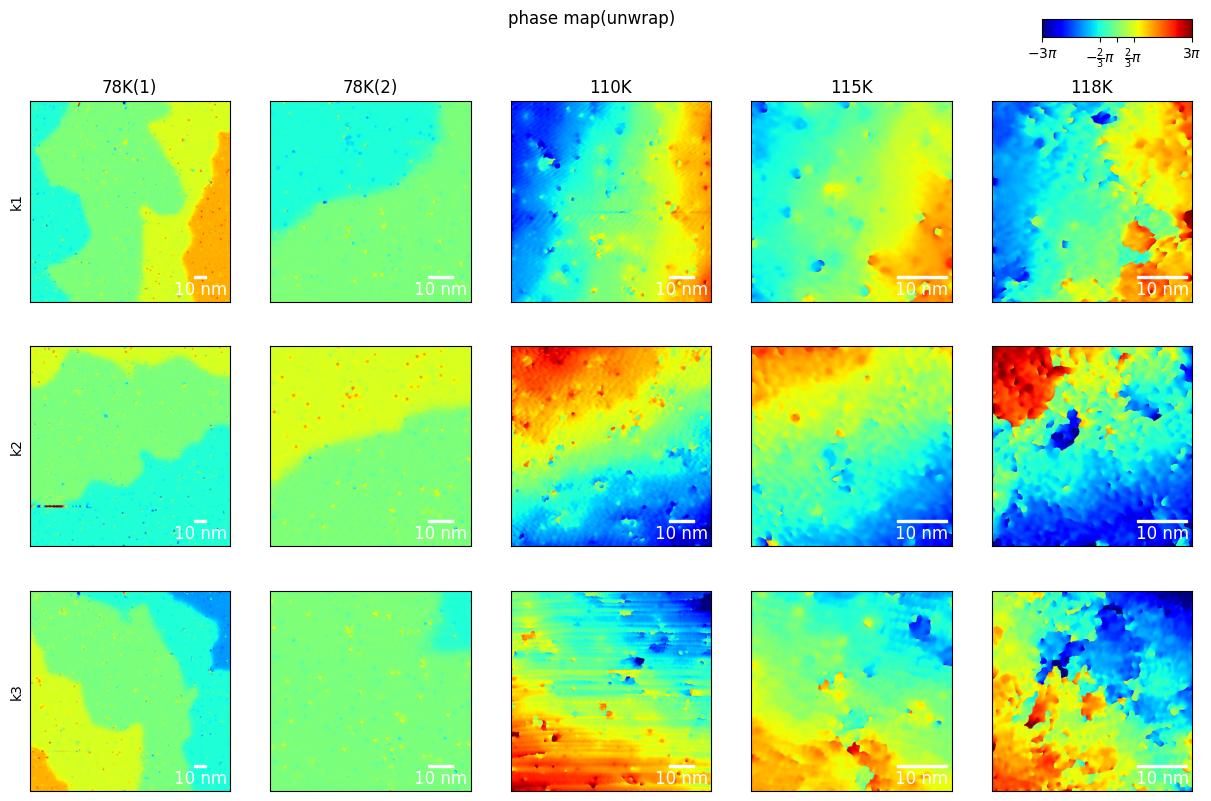

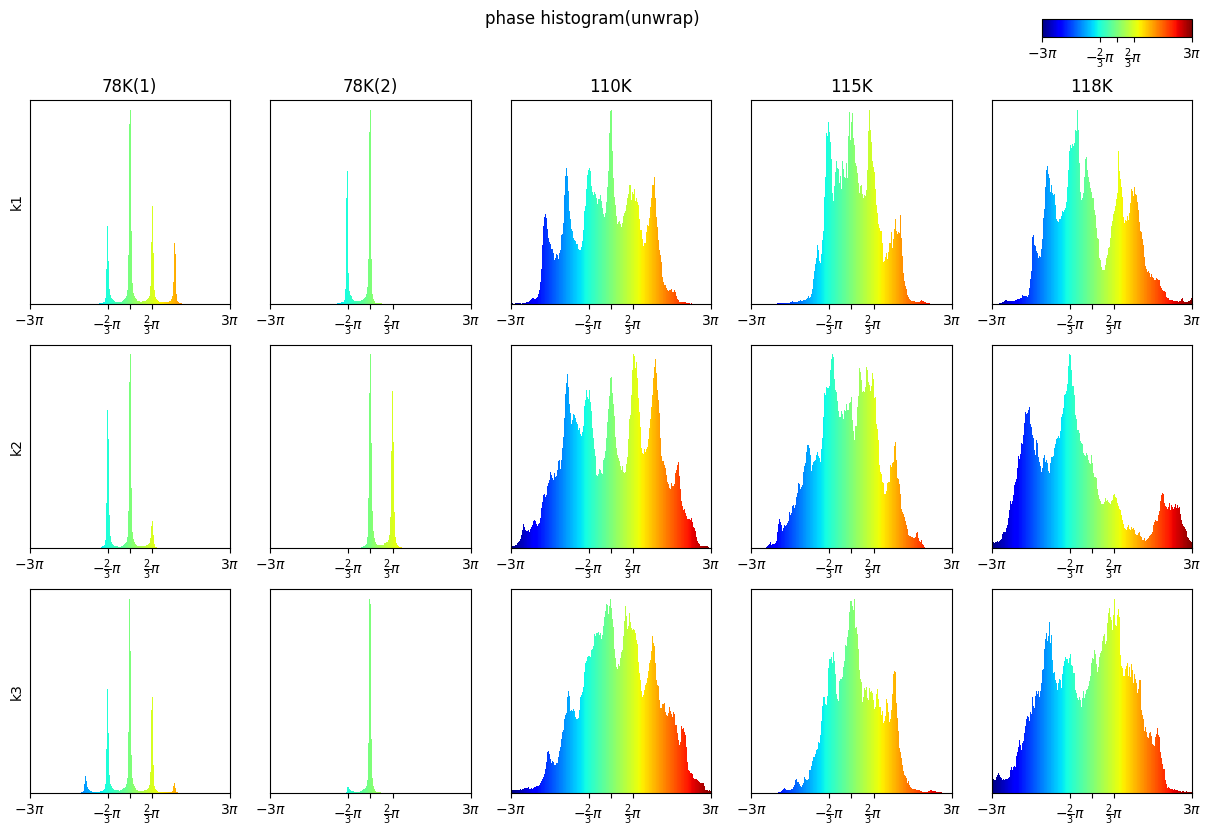

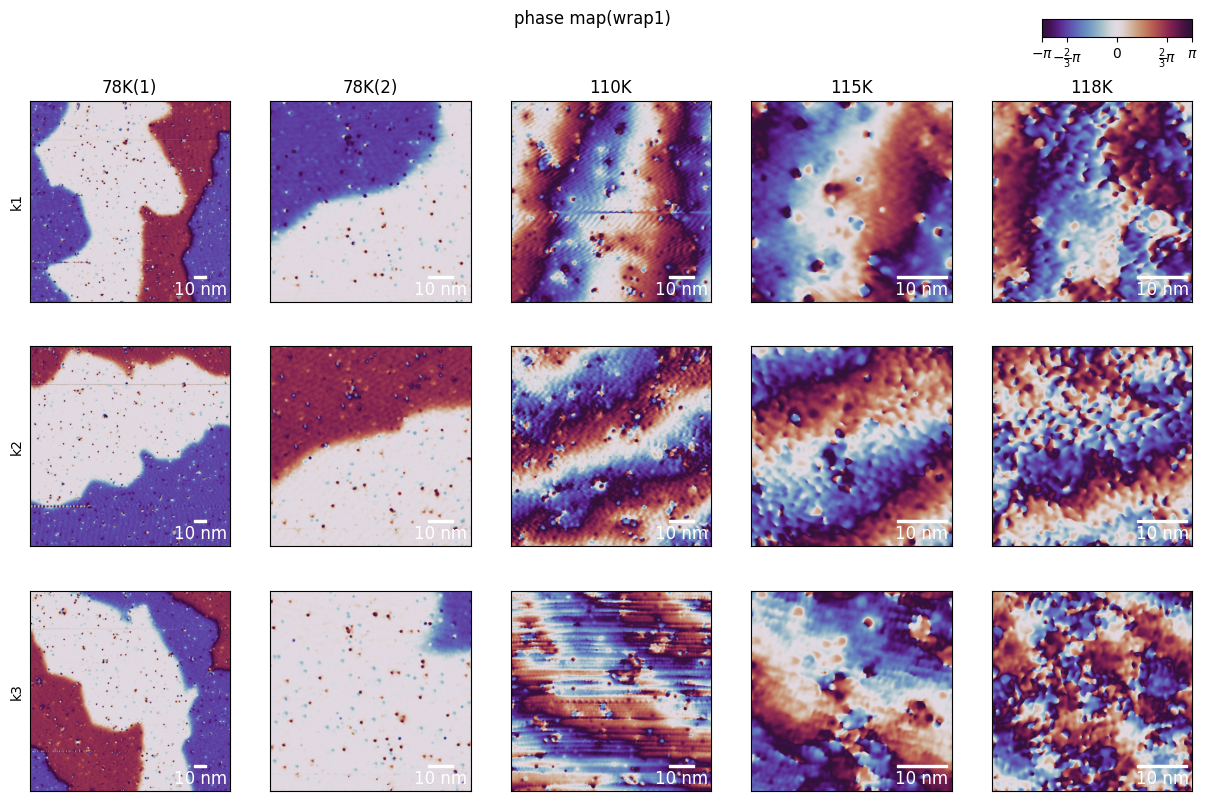

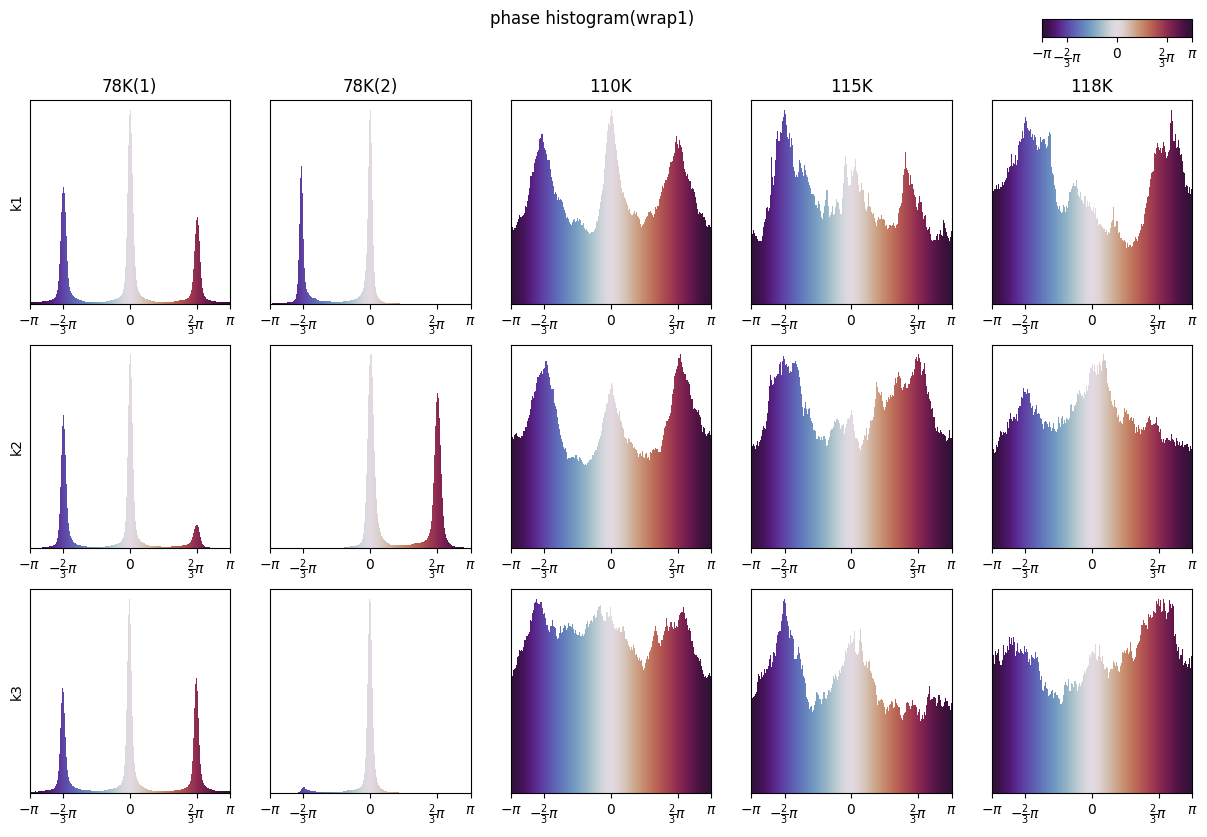

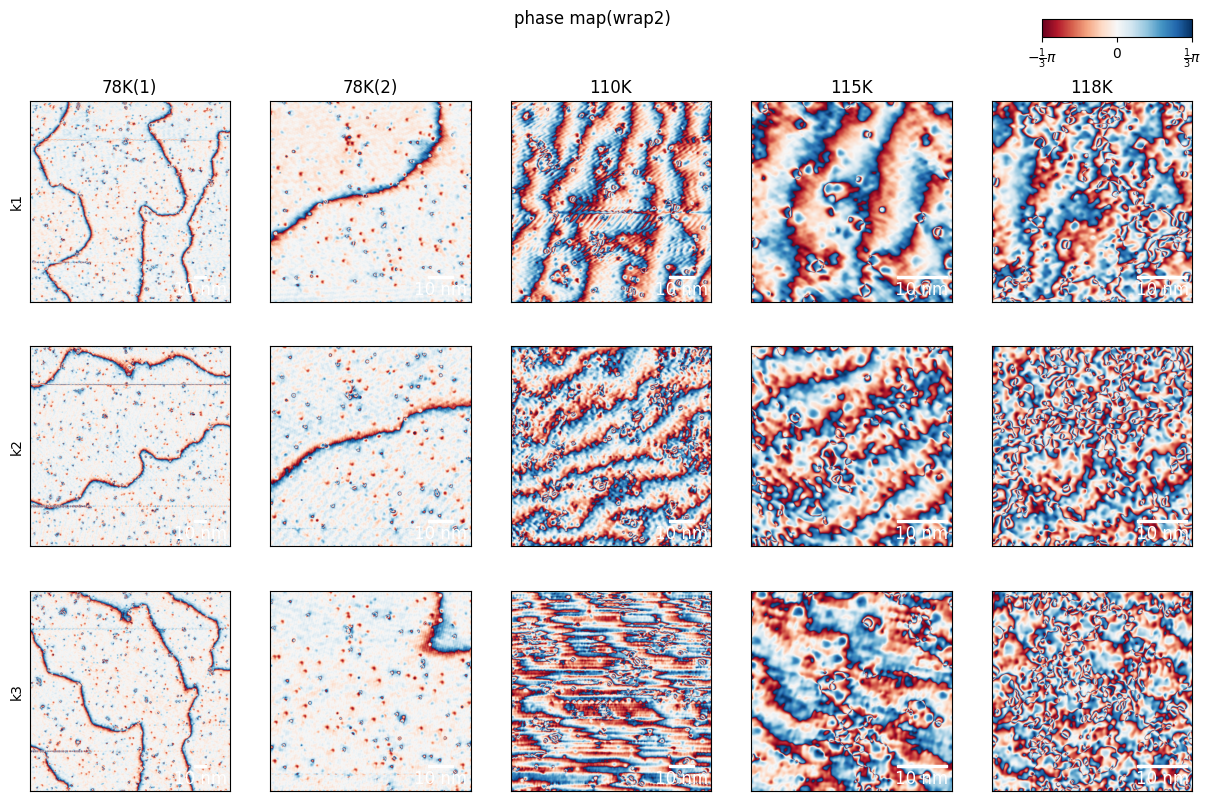

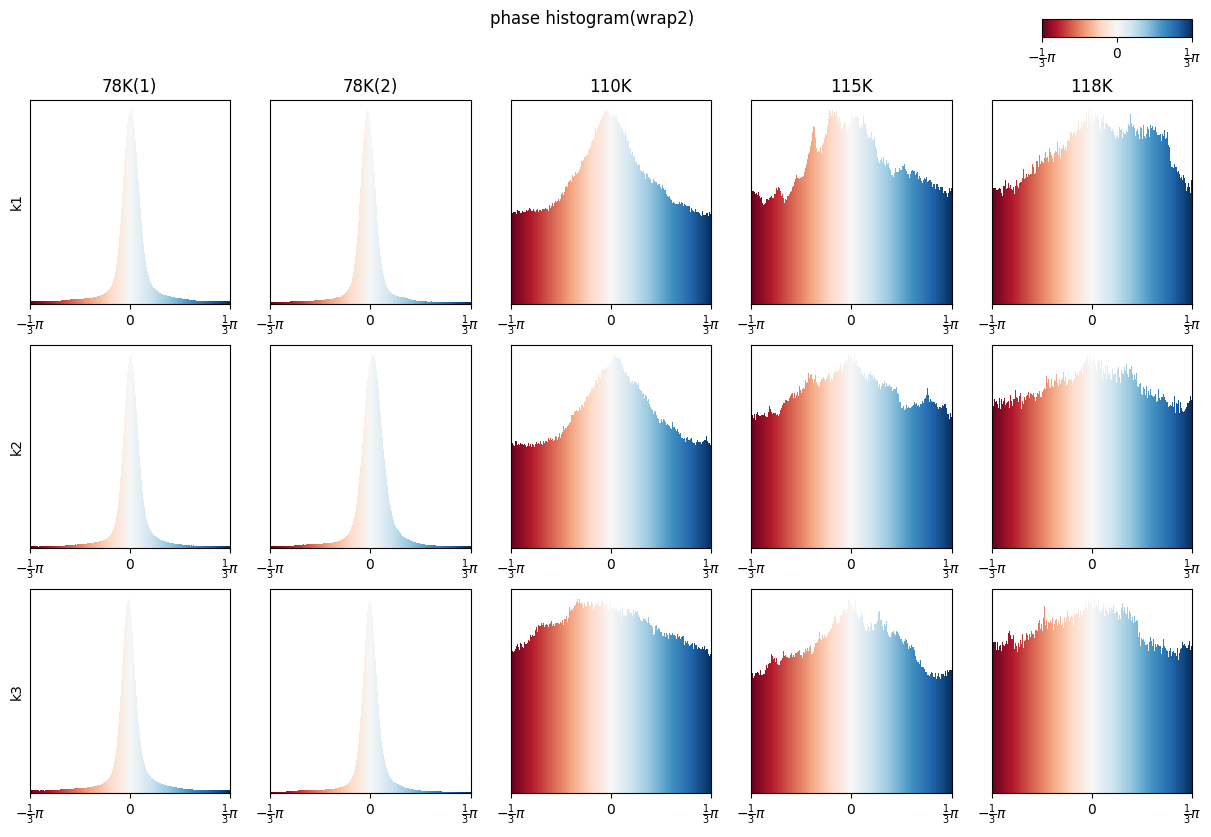

In [27]:
ips = range(3)
ids = range(2)
# ips = [0]#range(3)
# ids = [0]#range(2)
for ip in ips:
    for id in ids:
        dick = {**dfphase.iloc[ip,:3].to_dict(),
        **dfdraw.iloc[id,:-1].to_dict(),
        'stn': dfdraw.iloc[id]['drawStr']+"("+dfphase.iloc[ip]['phaseStr']+")"}
        fig,axs = drawmultiTk(**dick)
        
        cmap = dick['cmap']
        clim = dick['clim']
        xxyy = [0.8, 0.95, 0.1, 0.02]
        cbar = add_colorbar_to_figure(fig, cmap, clim, xxyy)
        ticks = dfphase.iloc[ip]['ticks']
        tick_labels = dfphase.iloc[ip]['tick_labels']
        cbar.set_ticks(ticks)
        cbar.set_ticklabels(tick_labels)

        # plt.close()        